In [1]:
# Data processing
import pandas as pd
import numpy as np
# Data visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
import seaborn as sns
# Model and performance
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.inspection import permutation_importance
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
import itertools
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [235]:
feature_df = pd.read_csv('feature_data.csv')
feature_df

,user_id,days_since_previous_order,total_orders,avg_days_between_orders,reorder_percentage,avg_basket_size,total_reorders
0,69323.0,14.0,5.0,22.0,100.0,4.0,111.0
1,69323.0,14.0,5.0,22.0,100.0,12.0,111.0
2,186419.0,7.0,77.0,5.5,100.0,9.0,681.0
3,186419.0,7.0,77.0,5.5,100.0,5.0,681.0
4,186419.0,7.0,77.0,5.5,100.0,4.0,681.0
...,...,...,...,...,...,...,...
71266,42792.0,2.0,11.0,2.5,100.0,15.0,563.0
71267,10377.0,4.0,7.0,4.0,100.0,3.0,55.0
71268,135385.0,9.0,27.0,9.0,100.0,12.0,414.0
71269,26919.0,19.0,19.0,19.0,100.0,2.0,217.0


In [146]:
#Scaling the Data
scaler = StandardScaler()
scaled_df = pd.DataFrame(data=scaler.fit_transform(feature_df), columns=feature_df.columns)
scaled_df

,user_id,days_since_previous_order,total_orders,avg_days_between_orders,reorder_percentage,avg_basket_size,total_reorders
0,-0.564881,0.471410,-1.052562,1.633760,0.793115,-0.596725,-0.758636
1,-0.564881,0.471410,-1.052562,1.633760,0.793115,0.537024,-0.758636
2,1.404476,-0.387281,2.577110,-0.645188,0.793115,0.111868,0.942387
3,1.404476,-0.387281,2.577110,-0.645188,0.793115,-0.455007,0.942387
4,1.404476,-0.387281,2.577110,-0.645188,0.793115,-0.596725,0.942387
...,...,...,...,...,...,...,...
71266,-1.011088,-1.000631,-0.786976,-1.128602,0.793115,0.962180,0.590246
71267,-1.627294,-0.755291,-0.964033,-0.852366,0.793115,-0.738444,-0.925754
71268,0.546171,-0.141940,-0.078747,-0.161775,0.793115,0.537024,0.145592
71269,-1.278045,1.084761,-0.432862,1.219406,0.793115,-0.880163,-0.442305


In [147]:
#Normalizing the Data
normalizer = Normalizer()
norm_df = pd.DataFrame(data=normalizer.fit_transform(scaled_df), columns=feature_df.columns)
norm_df

,user_id,days_since_previous_order,total_orders,avg_days_between_orders,reorder_percentage,avg_basket_size,total_reorders
0,-0.232972,0.194423,-0.434105,0.673808,0.327102,-0.246106,-0.312882
1,-0.234325,0.195551,-0.436626,0.677720,0.329002,0.222770,-0.314699
2,0.429162,-0.118340,0.787480,-0.197148,0.242350,0.034183,0.287962
3,0.425317,-0.117280,0.780424,-0.195382,0.240178,-0.137789,0.285383
4,0.422439,-0.116487,0.775145,-0.194060,0.238554,-0.179483,0.283452
...,...,...,...,...,...,...,...
71266,-0.419115,-0.414780,-0.326216,-0.467827,0.328761,0.398842,0.244668
71267,-0.619241,-0.287414,-0.366847,-0.324354,0.301807,-0.281003,-0.352281
71268,0.480980,-0.124998,-0.069348,-0.142466,0.698449,0.472925,0.128214
71269,-0.518155,0.439792,-0.175494,0.494381,0.321551,-0.356842,-0.179323


### PCA Analysis

In [148]:
# Perform PCA on the normalized dataframe
pca_model = PCA(n_components=None)
pca_model.fit(scaled_df)

# Transform the normalized dataframe using the PCA model
pca_df = pca.transform(scaled_df)

# Convert the transformed dataframe to a Pandas dataframe
pca_df = pd.DataFrame(pca_df, columns=feature_df.columns)
pca_df

,user_id,days_since_previous_order,total_orders,avg_days_between_orders,reorder_percentage,avg_basket_size,total_reorders
0,2.113894,-0.481797,0.531631,-0.393100,-0.186753,0.242205,-0.804762
1,1.997544,0.273387,0.580959,-0.683861,0.550948,-0.022990,-0.798223
2,-2.100198,0.185172,-1.376511,-1.320678,-1.176382,-1.106713,0.131003
3,-2.042023,-0.192420,-1.401175,-1.175298,-1.545233,-0.974115,0.127734
4,-2.027479,-0.286818,-1.407341,-1.138953,-1.637445,-0.940966,0.126916
...,...,...,...,...,...,...,...
71266,-0.994845,-0.399725,1.026045,-0.743918,1.610603,0.674511,0.123119
71267,0.234162,-1.928011,1.530845,0.130113,0.864087,0.112588,0.118284
71268,-0.142700,-0.018582,-0.530515,-0.846847,0.519185,-0.011606,0.021263
71269,1.809765,-0.426890,1.245468,-0.528621,-0.879116,0.116606,-0.096003


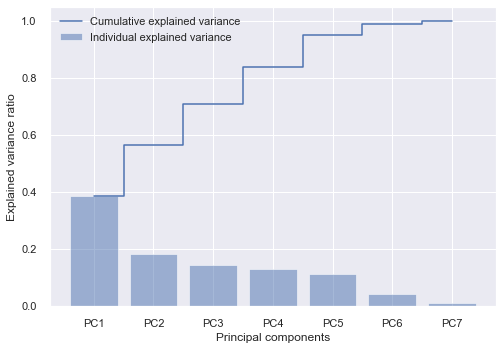

In [149]:
# assume that you already have a PCA object named pca with fitted data
variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance)

# create a bar plot
fig, ax = plt.subplots()
ax.bar(range(len(variance)), variance, alpha=0.5, align='center', label='Individual explained variance')
ax.step(range(len(variance)), cumulative_variance, where='mid', label='Cumulative explained variance')
ax.set_xticks(range(len(variance)))
ax.set_xticklabels(['PC{}'.format(i+1) for i in range(len(variance))])
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal components')
ax.legend(loc='best')
plt.show()

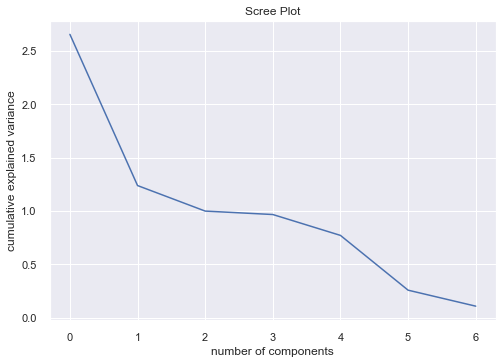

In [150]:
plt.plot(pca_model.explained_variance_)
plt.title('Scree Plot')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [168]:
# Get the feature importance by value
fi = pd.DataFrame(pca.components_,columns=feature_df.columns,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
fi = fi.apply(lambda x: np.abs(x))
fi = fi.T
fi['importance'] = fi.sum(axis=1)
fi = fi.sort_values(by='importance', ascending=False)
fi

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,importance
total_reorders,0.458496,0.337961,0.027895,0.305145,0.286208,0.706721,0.017397,2.139823
days_since_previous_order,0.514324,0.349451,0.012019,0.120316,0.332177,0.003182,0.698844,2.030313
total_orders,0.470243,0.157490,0.006501,0.155197,0.535948,0.665132,0.017278,2.007790
avg_days_between_orders,0.525553,0.331594,0.014687,0.115145,0.298955,0.006575,0.714806,2.007316
avg_basket_size,0.102624,0.666094,0.043509,0.256459,0.650674,0.233910,0.005768,1.959037
reorder_percentage,0.131629,0.427115,0.010144,0.888299,0.087717,0.057843,0.005373,1.608118
user_id,0.007759,0.052919,0.998410,0.014829,0.007581,0.005674,0.002504,1.089677


In [169]:
pca_df_two = pca_df.drop(['total_orders','avg_days_between_orders','avg_basket_size','reorder_percentage','user_id'],axis=1)
pca_df_two

,days_since_previous_order,total_reorders
0,-0.481797,-0.804762
1,0.273387,-0.798223
2,0.185172,0.131003
3,-0.192420,0.127734
4,-0.286818,0.126916
...,...,...
71266,-0.399725,0.123119
71267,-1.928011,0.118284
71268,-0.018582,0.021263
71269,-0.426890,-0.096003


In [223]:
pca_df_three = pca_df.drop(['avg_days_between_orders','avg_basket_size','reorder_percentage','user_id'],axis=1)
pca_df_three

,days_since_previous_order,total_orders,total_reorders
0,-0.481797,0.531631,-0.804762
1,0.273387,0.580959,-0.798223
2,0.185172,-1.376511,0.131003
3,-0.192420,-1.401175,0.127734
4,-0.286818,-1.407341,0.126916
...,...,...,...
71266,-0.399725,1.026045,0.123119
71267,-1.928011,1.530845,0.118284
71268,-0.018582,-0.530515,0.021263
71269,-0.426890,1.245468,-0.096003


In [171]:
pca_df_four = pca_df.drop(['avg_basket_size','reorder_percentage','user_id'],axis=1)
pca_df_four

,days_since_previous_order,total_orders,avg_days_between_orders,total_reorders
0,-0.481797,0.531631,-0.393100,-0.804762
1,0.273387,0.580959,-0.683861,-0.798223
2,0.185172,-1.376511,-1.320678,0.131003
3,-0.192420,-1.401175,-1.175298,0.127734
4,-0.286818,-1.407341,-1.138953,0.126916
...,...,...,...,...
71266,-0.399725,1.026045,-0.743918,0.123119
71267,-1.928011,1.530845,0.130113,0.118284
71268,-0.018582,-0.530515,-0.846847,0.021263
71269,-0.426890,1.245468,-0.528621,-0.096003


### Kmeans Clustering

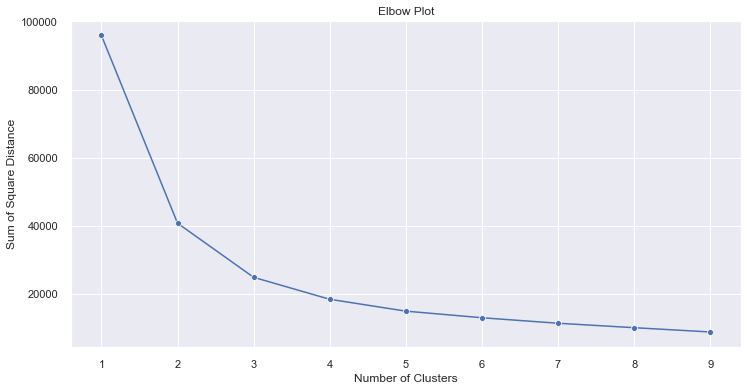

In [173]:
#Elbow Plot
sum_of_sq_dist = []

for i in range(1,10):
    kmeans_two_model = KMeans(n_clusters=i)
    
    kmeans_two_model.fit(pca_df_two)
    
    sum_of_sq_dist.append(kmeans_two_model.inertia_)
    
plt.figure(figsize=[12,6])

sns.lineplot(x=range(1,10), y=sum_of_sq_dist, marker='o')
plt.xticks(range(1,10))
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Distance')

plt.show()

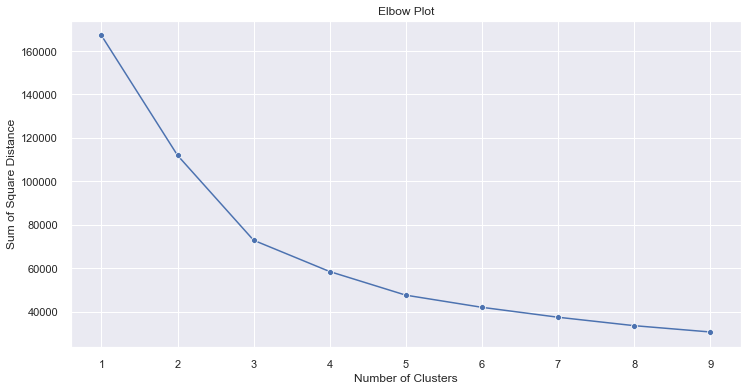

In [205]:
#Elbow Plot
sum_of_sq_dist = []

for i in range(1,10):
    kmeans_three_model = KMeans(n_clusters=i)
    
    kmeans_three_model.fit(pca_df_three)
    
    sum_of_sq_dist.append(kmeans_three_model.inertia_)
    
plt.figure(figsize=[12,6])

sns.lineplot(x=range(1,10), y=sum_of_sq_dist, marker='o')
plt.xticks(range(1,10))
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Distance')

plt.show()

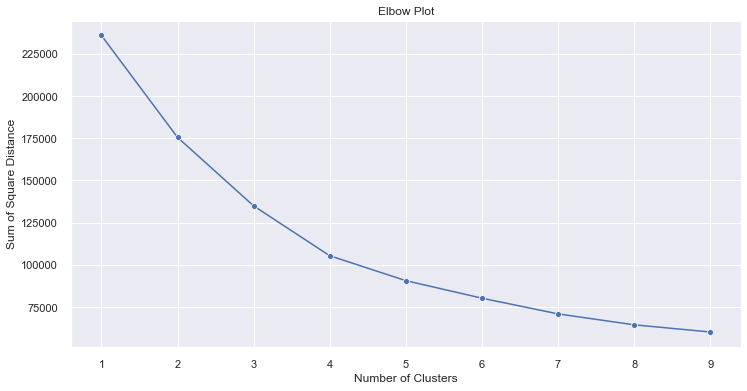

In [175]:
#Elbow Plot
sum_of_sq_dist = []

for i in range(1,10):
    kmeans_four_model = KMeans(n_clusters=i)
    
    kmeans_four_model.fit(pca_df_four)
    
    sum_of_sq_dist.append(kmeans_four_model.inertia_)
    
plt.figure(figsize=[12,6])

sns.lineplot(x=range(1,10), y=sum_of_sq_dist, marker='o')
plt.xticks(range(1,10))
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Distance')

plt.show()

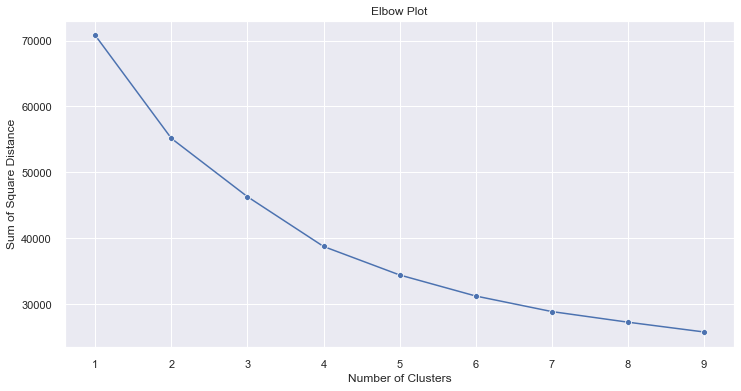

In [176]:
#Elbow Plot
sum_of_sq_dist = []

for i in range(1,10):
    kmeans_norm_model = KMeans(n_clusters=i)
    
    kmeans_norm_model.fit(norm_df)
    
    sum_of_sq_dist.append(kmeans_norm_model.inertia_)
    
plt.figure(figsize=[12,6])

sns.lineplot(x=range(1,10), y=sum_of_sq_dist, marker='o')
plt.xticks(range(1,10))
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Distance')

plt.show()

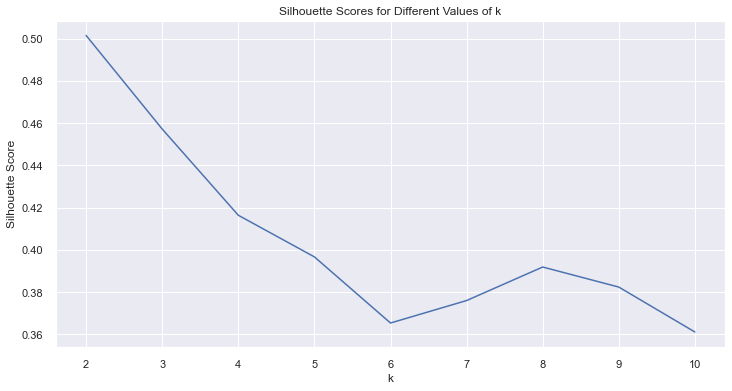

In [177]:
silhouette_scores = []

for i in range(2, 11):
    kmeans_two_model = KMeans(n_clusters=i)
    kmeans_two_model.fit(pca_df_two)
    silhouette_scores.append(silhouette_score(pca_df_two, kmeans_two_model.labels_))

#Silhouette Scores
plt.figure(figsize=[12,6])
plt.plot(range(2,11), silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of k')
plt.show()

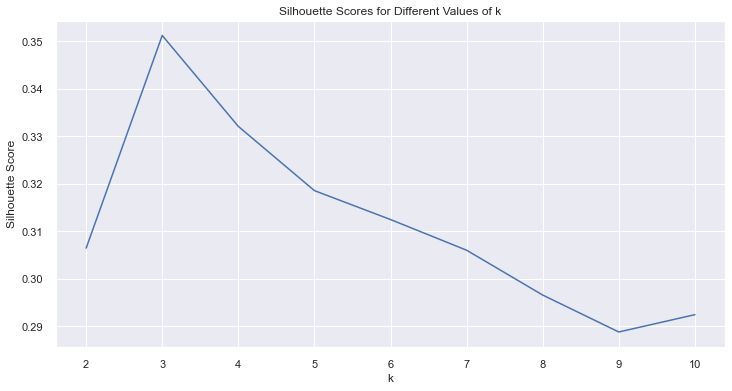

In [178]:
silhouette_scores = []

for i in range(2, 11):
    kmeans_three_model = KMeans(n_clusters=i)
    kmeans_three_model.fit(pca_df_three)
    silhouette_scores.append(silhouette_score(pca_df_three, kmeans_three_model.labels_))

#Silhouette Scores
plt.figure(figsize=[12,6])
plt.plot(range(2,11), silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of k')
plt.show()

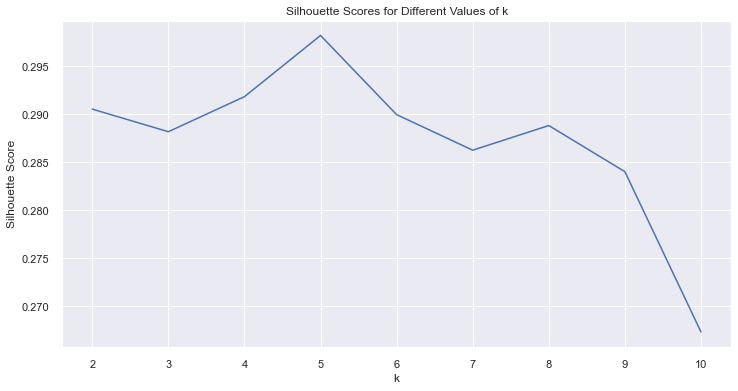

In [179]:
silhouette_scores = []

for i in range(2, 11):
    kmeans_four_model = KMeans(n_clusters=i)
    kmeans_four_model.fit(pca_df_four)
    silhouette_scores.append(silhouette_score(pca_df_four, kmeans_four_model.labels_))

#Silhouette Scores
plt.figure(figsize=[12,6])
plt.plot(range(2,11), silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of k')
plt.show()

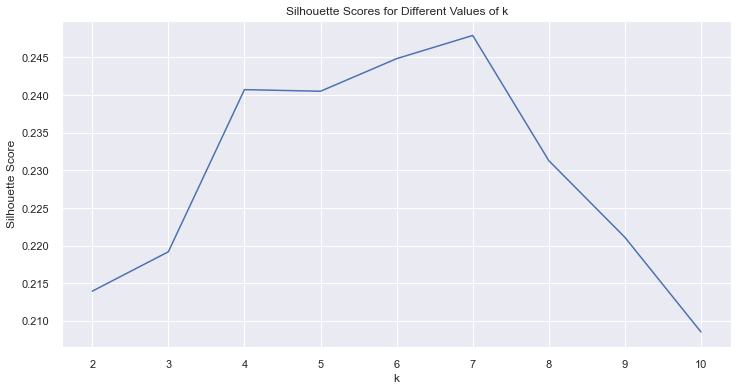

In [180]:
silhouette_scores = []

for i in range(2, 11):
    kmeans_norm_model = KMeans(n_clusters=i)
    kmeans_norm_model.fit(norm_df)
    silhouette_scores.append(silhouette_score(norm_df, kmeans_norm_model.labels_))

#Silhouette Scores
plt.figure(figsize=[12,6])
plt.plot(range(2,11), silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of k')
plt.show()

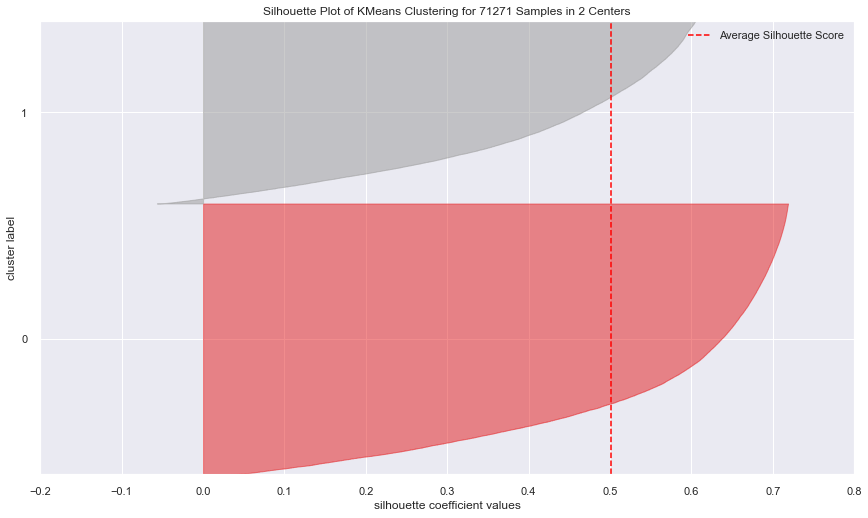

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 71271 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [271]:
n_twotwo_model = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(n_twotwo_model, size=(1050, 600))

visualizer.fit(pca_df_two)
visualizer.show()

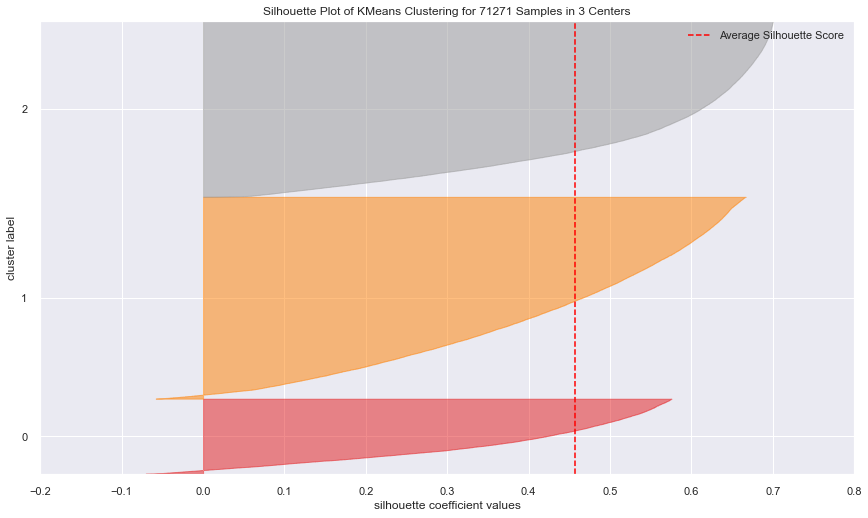

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 71271 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [273]:
n_twothree_model = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(n_twothree_model, size=(1050, 600))

visualizer.fit(pca_df_two)
visualizer.show()

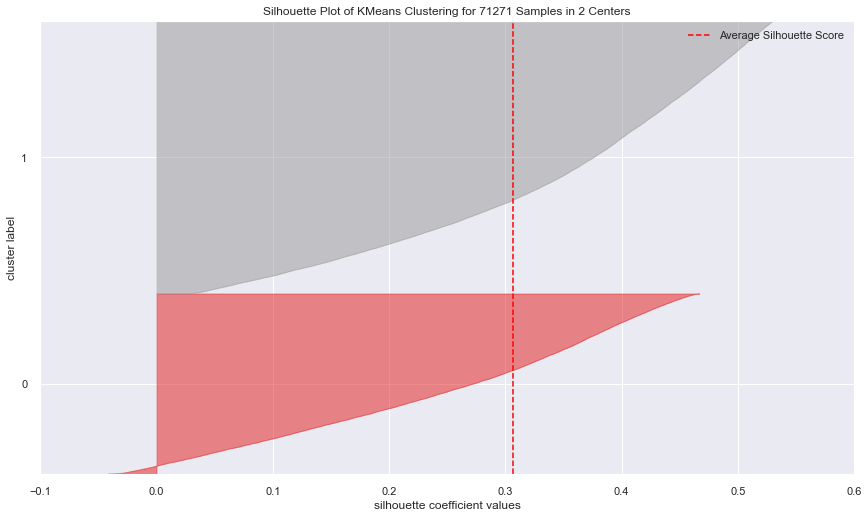

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 71271 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [181]:
n_two_model = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(n_two_model, size=(1050, 600))

visualizer.fit(pca_df_three)
visualizer.show()

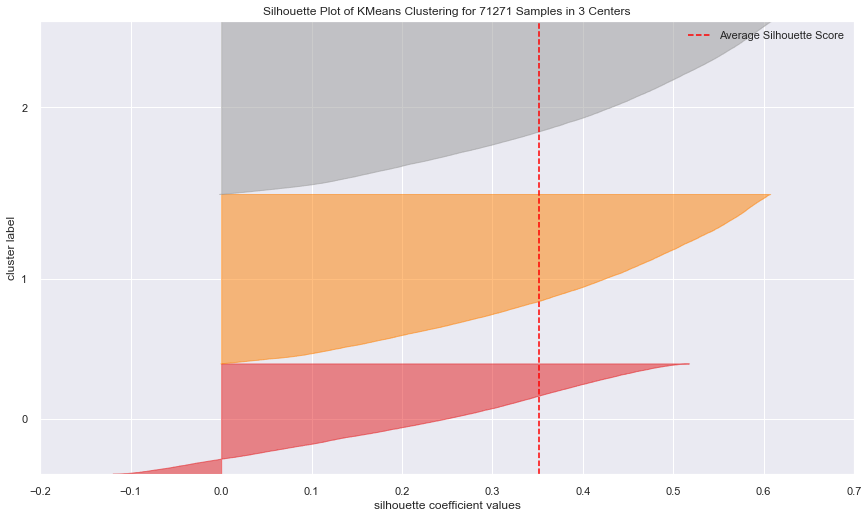

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 71271 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [182]:
n_three_model = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(n_three_model, size=(1050, 600))

visualizer.fit(pca_df_three)
visualizer.show()

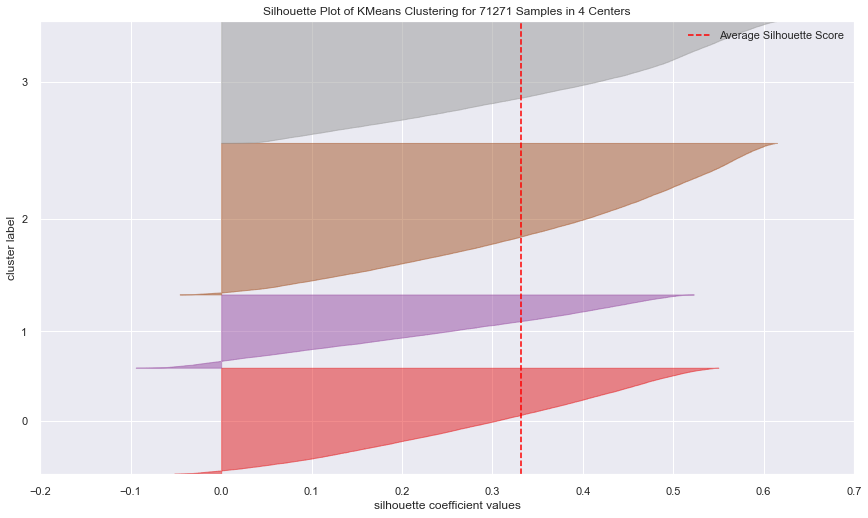

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 71271 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [184]:
n_four_model = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(n_four_model, size=(1050, 600))

visualizer.fit(pca_df_three)
visualizer.show()

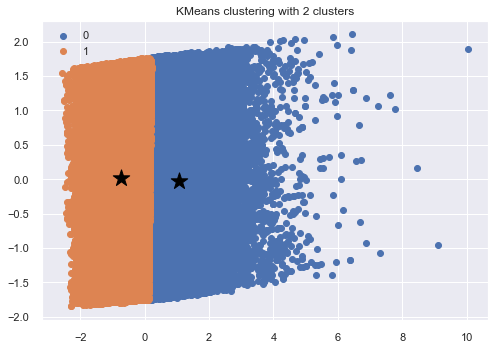

In [213]:
#Fit the Data
kmeans_two = KMeans(n_clusters=2)
label_two = kmeans_two.fit_predict(pca_df_three)
#Getting the Centroids
centroids_two = kmeans_two.cluster_centers_
u_labels_two = np.unique(label_two)
 
#plotting the results: 
for i in u_labels_two:
    plt.scatter(pca_df_three.iloc[label_two == i , 0] , pca_df_three.iloc[label_two == i , 1], label = i)

# plot the centroids
plt.scatter(centroids_two[:, 0], centroids_two[:, 1], marker='*', s=300, c='black')

plt.legend()
plt.title('KMeans clustering with 2 clusters')
plt.show()

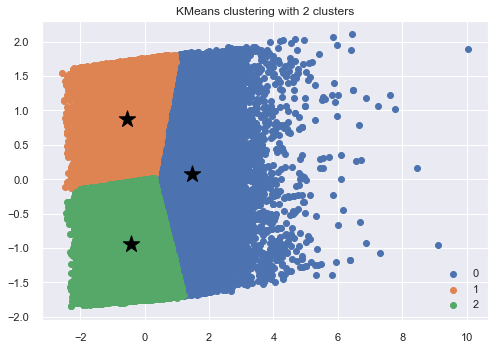

In [202]:
#Fit the Data
kmeans_three = KMeans(n_clusters=3)
label_three = kmeans_three.fit_predict(pca_df_three)
#Getting the Centroids
centroids_three = kmeans_three.cluster_centers_
u_labels_three = np.unique(label_three)
 
#plotting the results: 
for i in u_labels_three:
    plt.scatter(pca_df_three.iloc[label_three == i , 0] , pca_df_three.iloc[label_three == i , 1], label = i)

# plot the centroids
plt.scatter(centroids_three[:, 0], centroids_three[:, 1], marker='*', s=300, c='black')

plt.legend()
plt.title('KMeans clustering with 2 clusters')
plt.show()

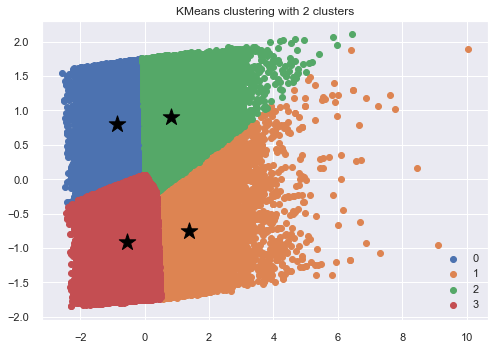

In [204]:
#Fit the Data
kmeans_four = KMeans(n_clusters=4)
label_four = kmeans_four.fit_predict(pca_df_three)
#Getting the Centroids
centroids_four = kmeans_four.cluster_centers_
u_labels_four = np.unique(label_four)
 
#plotting the results: 
for i in u_labels_four:
    plt.scatter(pca_df_three.iloc[label_four == i , 0] , pca_df_three.iloc[label_four == i , 1], label = i)

# plot the centroids
plt.scatter(centroids_four[:, 0], centroids_four[:, 1], marker='*', s=300, c='black')

plt.legend()
plt.title('KMeans clustering with 2 clusters')
plt.show()

In [226]:
# Fit K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(pca_df_three)

#Creating a dataframe of optimal principal component columns that are clustered
pca_df_three['clusters'] = y_kmeans
cluster_df = pca_df_three
cluster_df

,days_since_previous_order,total_orders,total_reorders,clusters
0,-0.481797,0.531631,-0.804762,1
1,0.273387,0.580959,-0.798223,1
2,0.185172,-1.376511,0.131003,2
3,-0.192420,-1.401175,0.127734,2
4,-0.286818,-1.407341,0.126916,2
...,...,...,...,...
71266,-0.399725,1.026045,0.123119,1
71267,-1.928011,1.530845,0.118284,1
71268,-0.018582,-0.530515,0.021263,2
71269,-0.426890,1.245468,-0.096003,1


In [230]:
cluster_df.to_csv(r'C:\Users\p-mir\MS Data Science\Big Data Technologies\Final\cluster_data.csv', index=False)

C:\Users\p-mir\anaconda3\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
C:\Users\p-mir\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
C:\Users\p-mir\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
C:\Users\p-mir\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for pa

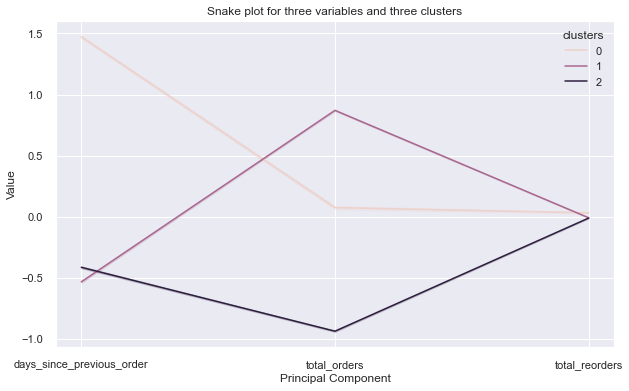

In [234]:
# create a melted dataframe for the snake plot
melted_df = pd.melt(cluster_df, id_vars=['clusters'], var_name='Principal Component', value_name='Value')

# create the snake plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Principal Component', y='Value', hue='clusters', data=melted_df)
plt.title('Snake plot for three variables and three clusters')
plt.show()